In [12]:
import os, sys
from pathlib import Path

syndp_path = Path().cwd().parents[1].joinpath('Syndp/src')
sys.path.append(syndp_path.as_posix())

from syndp import boundedlaplacemechanism as blm

import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [13]:
from syndp import TimeDP, Vector_creator

<Figure size 300x300 with 0 Axes>

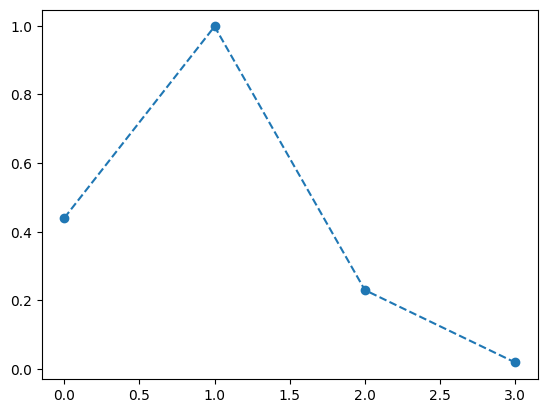

<Figure size 300x300 with 0 Axes>

In [29]:
vector = [0.44, 0.998, 0.23, 0.0190]
plt.plot(vector, 'o--');
plt.figure(figsize=(3,3))

In [20]:
epsilons = [0, 0.1, 0.2, 0.4, 0.8, 1.6]
sens = max(vector) - min(vector)
test_book = {k : None for k in epsilons}

for eps in epsilons :
    tdp = TimeDP(eps, 0, 'laplace', sens,seed=0)
    creator = Vector_creator(vector, tdp)
    new = creator.new_vector
    test_book[eps]  =  new

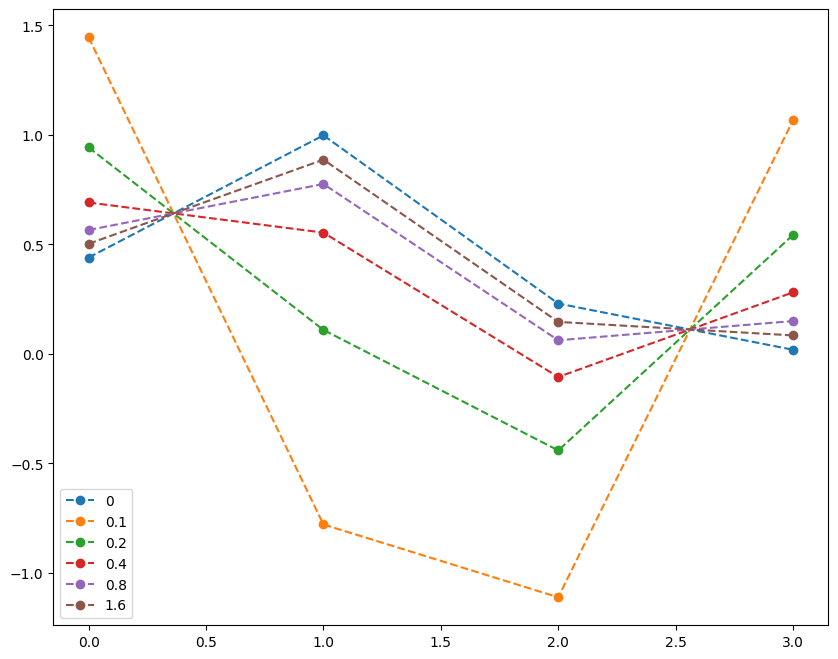

In [21]:
fig, axes = plt.subplots(1,1, figsize=(10,8))
for idx, (eps, data) in enumerate(test_book.items()):
    # r = idx // 3
    # c = idx % 3
    
    # axes.xlim(-1,1)
    axes.plot(data, 'o--', label=eps)
plt.legend()
plt.show()

In [24]:
test_book = {k : None for k in epsilons}

for eps in epsilons :
    tdp = TimeDP(eps, 0, 'bounded laplace', seed=0)
    creator = Vector_creator(vector, tdp)
    new = creator.new_vector
    test_book[eps]  =  new

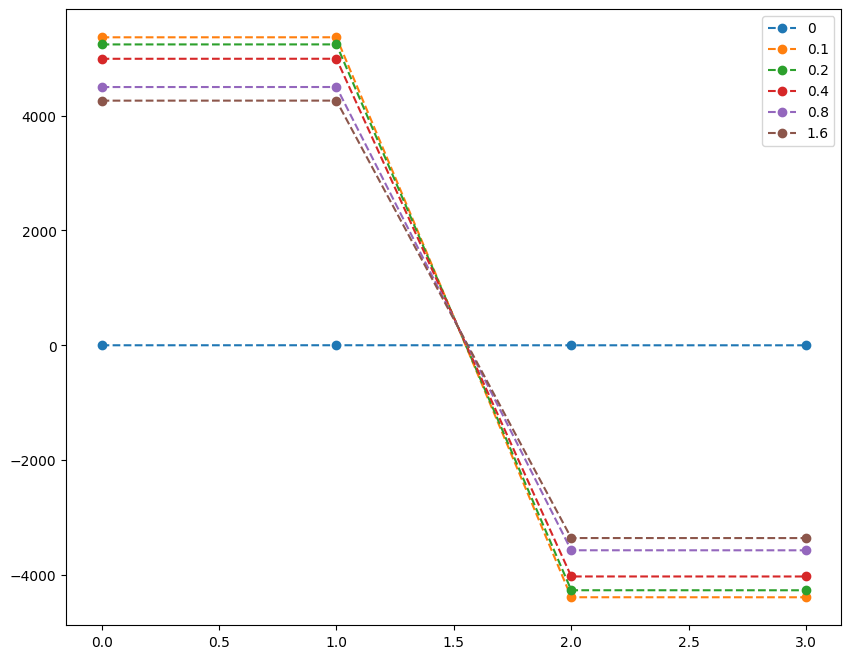

In [25]:
fig, axes = plt.subplots(1,1, figsize=(10,8))
for idx, (eps, data) in enumerate(test_book.items()):
    # r = idx // 3
    # c = idx % 3
    
    # axes.xlim(-1,1)
    axes.plot(data, 'o--', label=eps)
# plt.ylim(0,7)
plt.legend()
plt.show()

## Just Laplace Mechanism

In [26]:
vector

[0.44, 0.998, 0.23, 0.019]

In [27]:
from syndp import laplace_mechanism as lm

test_book = {k : None for k in epsilons}

for eps in epsilons :
    val = np.array(vector) + np.array([lm(0, 9999, eps, seed=noise) for noise in range(len(vector))])
    test_book[eps]  =  val

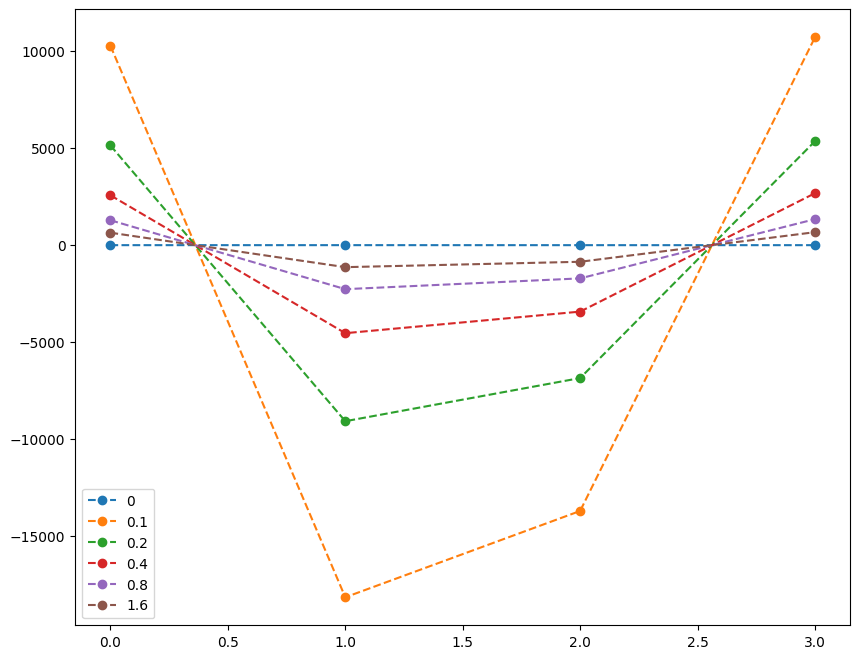

In [28]:
fig, axes = plt.subplots(1,1, figsize=(10,8))
for idx, (eps, data) in enumerate(test_book.items()):
    # r = idx // 3
    # c = idx % 3
    
    # axes.xlim(-1,1)
    axes.plot(data, 'o--', label=eps)
# plt.ylim(0,7)
plt.legend()
plt.show()